In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import os

In [25]:
# Load an image, convert to RGB and grayscale.
def load_and_preprocess(image_path):
    image = cv.imread(image_path)
    if image is None:
        print(f"Error: Could not load {image_path}")
        return None, None
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image_rgb, gray

In [26]:
# Apply Canny edge detection.
def apply_canny_edge(gray_image):
    return cv.Canny(gray_image, 50, 100)

In [27]:
# Apply dilation, erosion, and hole filling.
def morphological_processing(edges):
    kernel_2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2,2))
    dilated_2 = cv.dilate(edges, kernel_2, iterations=1)
    eroded_2 = cv.erode(dilated_2, kernel_2, iterations=1)

    # Fill Holes
    filled = ndimage.binary_fill_holes(eroded_2).astype(np.uint8) * 255

    # Further Morphological Operations
    kernel_7 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))
    eroded_7 = cv.erode(filled, kernel_7, iterations=1)
    kernel_6 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (6,6))
    dilated_6 = cv.dilate(eroded_7, kernel_6, iterations=1)

    return dilated_2, eroded_2, filled, eroded_7, dilated_6

In [28]:
# Display multiple images in a single figure.
def display_results(images, titles):
    fig, ax = plt.subplots(2, 4, figsize=(16, 8))
    for i, (img, title) in enumerate(zip(images, titles)):
        ax[i//4, i%4].imshow(img if len(img.shape) == 3 else img, cmap='gray')
        ax[i//4, i%4].set_title(title)
        ax[i//4, i%4].axis('off')

    plt.tight_layout()
    plt.show()

In [29]:
# Complete processing pipeline for one image.
def process_image(image_path):
    image, gray = load_and_preprocess(image_path)
    if image is None:
        return

    edges = apply_canny_edge(gray)
    dilated_2, eroded_2, filled, eroded_7, dilated_6 = morphological_processing(edges)
    # binary_final = binarize_image(dilated_6)

    # Display images
    images = [image, edges, dilated_2, eroded_2, filled, eroded_7, dilated_6, dilated_6]
    titles = ['Original Image', 'Canny Edge', 'Dilated (2px)', 'Eroded (2px)', 'Filled Holes',
              'Eroded (7px)', 'Dilated (6px)', 'Final Segmentation']

    display_results(images, titles)

    return dilated_6

Processing images/image-001.jpg...


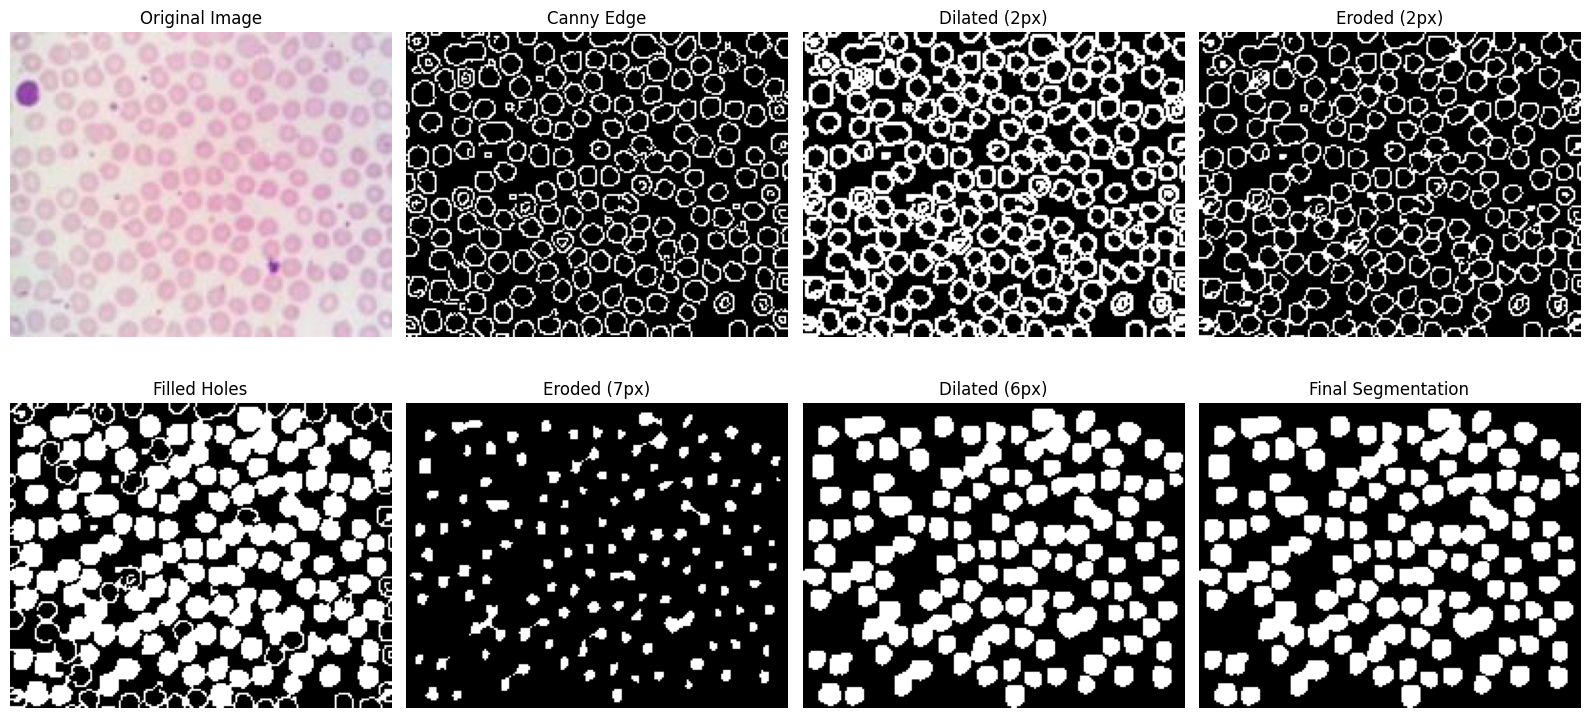

Processing images/image-002.jpg...


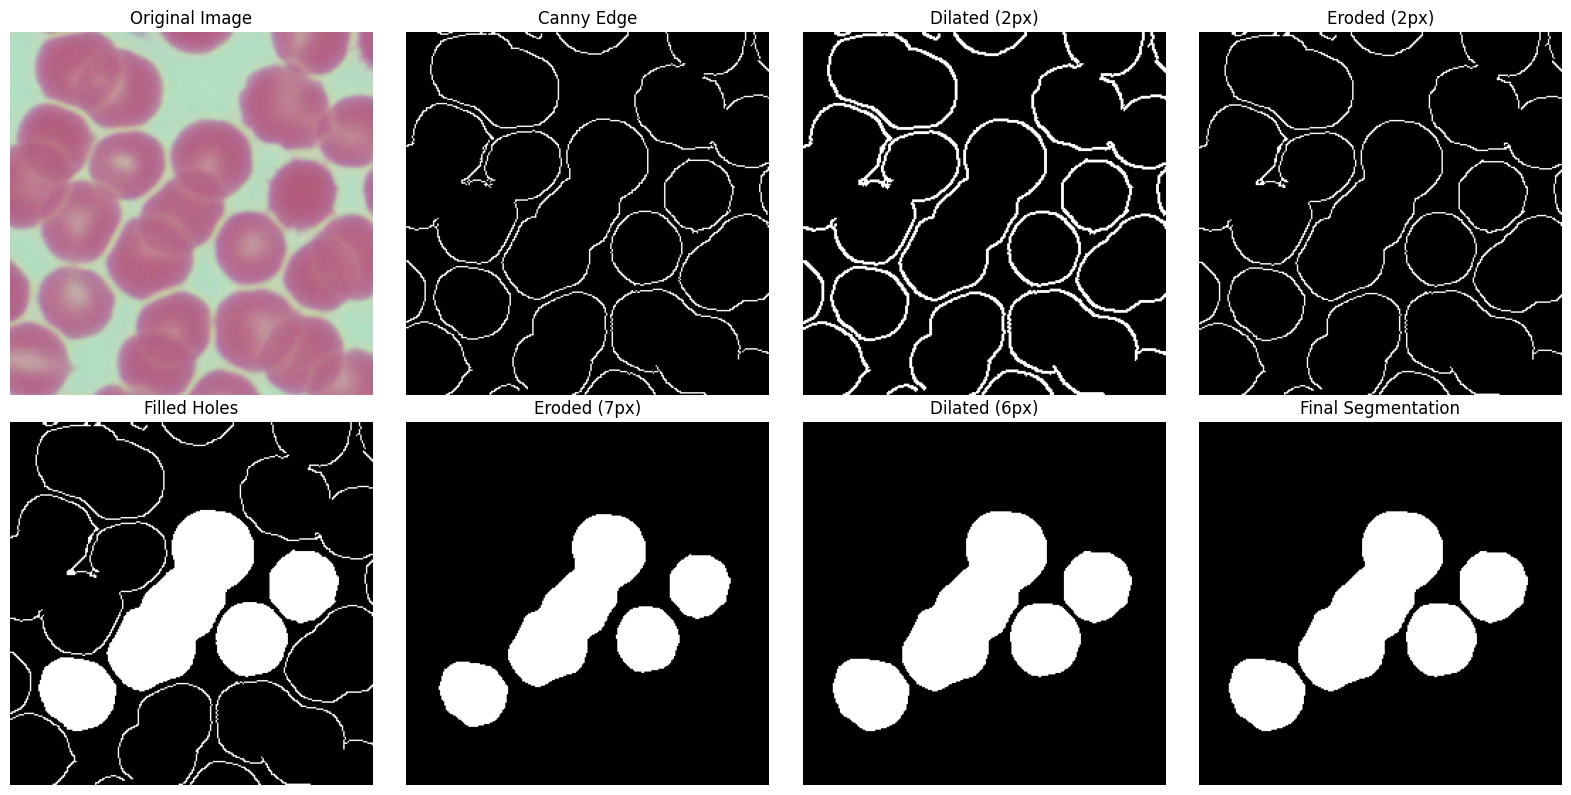

Processing images/image-003.jpg...


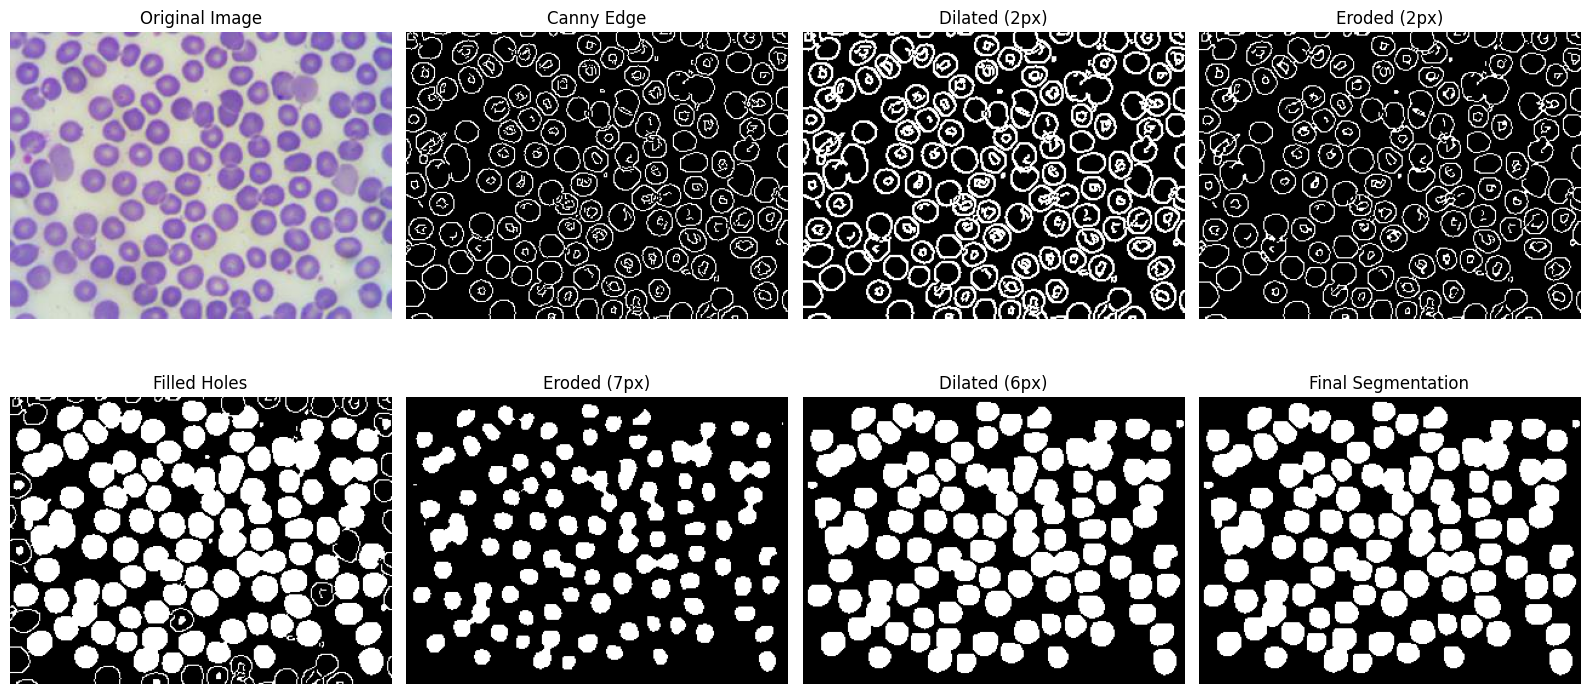

In [31]:
# Process Multiple Images
folder_image = 'images/'
image_file = ['image-001.jpg', 'image-002.jpg', 'image-003.jpg']
image_paths = [os.path.join(folder_image, file) for file in image_file]
for img_path in image_paths:
    print(f"Processing {img_path}...")
    process_image(img_path)